<a href="https://colab.research.google.com/github/deguc/Shannon/blob/main/401_Bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

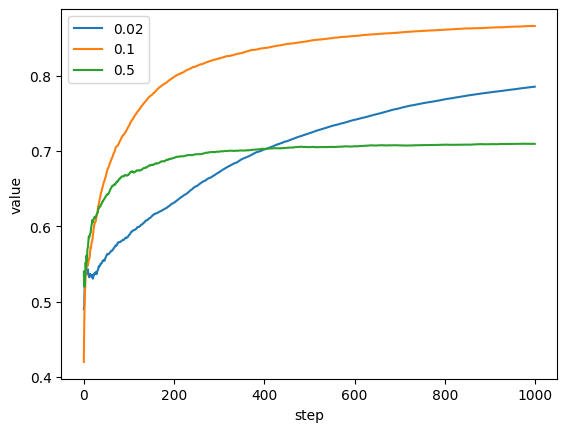

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Bandit:

    def __init__(self):
        self.rate = np.random.rand()

    def play(self):
        return (self.rate > np.random.rand()) * 1

class Agent:

    def __init__(self,n,eps=0.1):

        self.Q = np.zeros(n)
        self.n = np.zeros(n)
        self.eps = eps

    def update(self,a,r):

        self.n[a] += 1
        self.Q[a] += (r-self.Q[a]) / self.n[a]

    def select(self):

        if np.random.rand() < self.eps:
            return np.random.randint(len(self.Q))
        else:
            return np.argmax(self.Q)


np.set_printoptions(precision=2,suppress=True)

n = 10
runs = 100
steps = 1000

for e in [0.02,0.1,0.5]:

    v = np.zeros((runs,steps))

    for rn in range(runs):

        total = 0
        env = [Bandit() for _ in range(10)]
        agent = Agent(n,eps=e)

        for s in range(steps):

            a = agent.select()
            r = env[a].play()
            agent.update(a,r)

            total += r
            v[rn,s] = total / (s+1)

    value = np.mean(v,axis=0)

    plt.plot(value,label=f'{e}')

plt.xlabel('step')
plt.ylabel('value')
plt.legend()
plt.show()
